In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

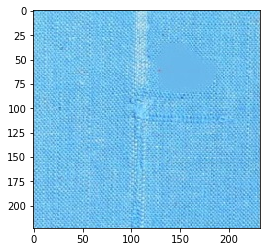

In [19]:
fabric_image_url = 'image3.jpg'

fabric_image = cv2.imread(fabric_image_url)
plt.imshow(cv2.cvtColor(fabric_image, cv2.COLOR_BGR2RGB))

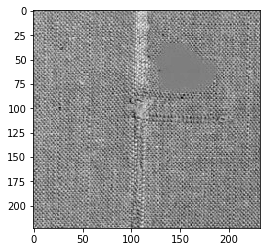

In [20]:
fabric_gs_image = cv2.cvtColor(fabric_image, cv2.COLOR_BGR2GRAY)
plt.imshow(fabric_gs_image,'gray')

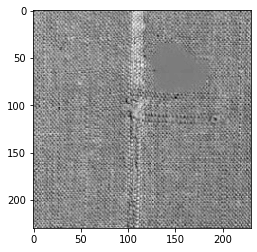

In [21]:
width,height = 230, 230
fabric_gs_image=cv2.resize(fabric_gs_image,(height,width),interpolation = cv2.INTER_AREA)
plt.imshow(fabric_gs_image,'gray')

In [22]:
img = fabric_gs_image.copy()

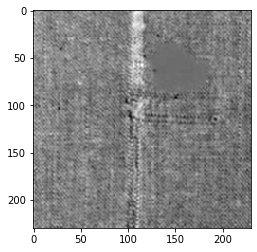

In [23]:
img = cv2.GaussianBlur(img,(3,3),0)
plt.imshow(img,'gray')

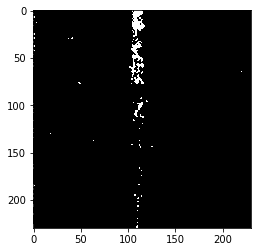

In [52]:
ret,thresh = cv2.threshold(img,190,255,cv2.THRESH_BINARY)
plt.imshow(thresh,'gray')

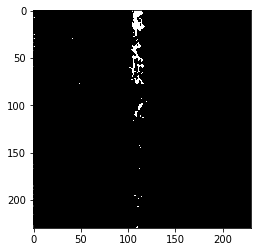

In [53]:
thresh = cv2.erode(thresh, (3,3), iterations=1)
plt.imshow(thresh,'gray')

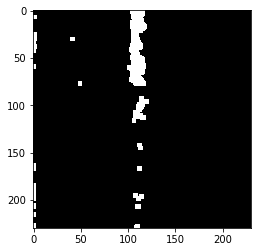

In [54]:
thresh = cv2.dilate(thresh, None, iterations=2)
plt.imshow(thresh,'gray')

In [55]:
pip install argparse

Note: you may need to restart the kernel to use updated packages.


In [56]:
from imutils import contours
from skimage import measure
import argparse
import imutils

In [57]:
# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")
 
# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue
 
	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
 
	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels > 100:
		mask = cv2.add(mask, labelMask)

In [58]:
cnts = cv2.findContours(mask.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [59]:
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]

In [60]:
# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the bright spot on the image
	(x, y, w, h) = cv2.boundingRect(c)
	((cX, cY), radius) = cv2.minEnclosingCircle(c)
	cv2.circle(fabric_image, (int(cX), int(cY)), int(radius),
		(0, 0, 255), 3)
	cv2.putText(fabric_image, "#{}".format(i + 1), (x, y - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

In [61]:
cv2.imshow("Image", fabric_image)
cv2.waitKey(0)

13